# 1. Setup

In [1]:
import matplotlib.pylab as plt
import random
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd
%matplotlib inline

sns.set()

# Here, we create a Python list that represents a deck of cards:
suits = ['Diamonds', 'Clubs', 'Hearts', 'Spades']
values = [*range(2, 11), 'J', 'Q', 'K', 'A']
deck = [f'{v}-{s}' for s in suits for v in values]

# Verify contents of deck:
print(f'Random sample from deck (sanity check): {random.sample(deck, 6)}')
assert len(deck) == 52

Random sample from deck (sanity check): ['10-Clubs', 'A-Spades', '6-Diamonds', 'J-Diamonds', '6-Clubs', '3-Clubs']


# 2. Probability and Central Tendency

The following experiment performs N iterations wherein a card is sampled from
the deck N times, with the deck restored to its full complement of cards for
each sample.

The success criteria for each trial is defined as selecting the "9 of Diamonds".
Since card selection is independent, we expect a probability (likelihood of
success) of 1/52.

In [2]:
n = 25000
success = []
card_of_interest = '9-Diamonds'
for iteration in range(n):
    random.shuffle(deck)
    cards = np.random.choice(deck, size=n, replace=True)
    success.append(np.count_nonzero(cards == card_of_interest))

df = pd.DataFrame(success, columns=['Successes'])
df['Successes'] = df['Successes'] / n

expected_success_rate = 1/len(deck)
mean_success_rate = df['Successes'].mean()
print(f'Expected success rate = {expected_success_rate:.05f}, Mean actual success rate = {mean_success_rate:.05f}')

Expected success rate = 0.01923, Mean actual success rate = 0.01924


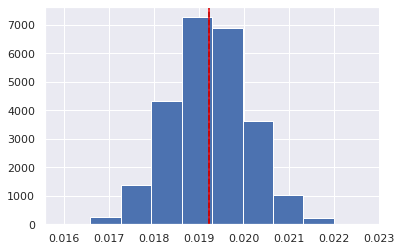

In [3]:
plt.hist(df)
plt.axvline(expected_success_rate, color='black', linestyle='dashed')
plt.axvline(mean_success_rate, color='red')

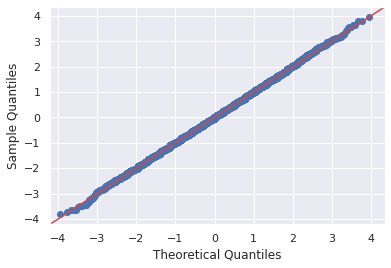

In [4]:
qq = sm.qqplot(df['Successes'], fit=True, line='45')

Expected success rate = 0.01923, Mean actual success rate = 0.02000


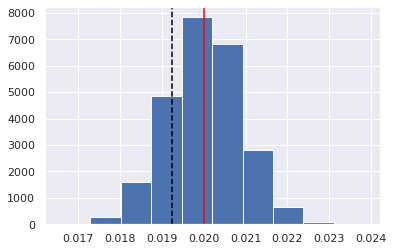

In [6]:
success = []
card_of_interest = '9-Diamonds'
index = deck.index(card_of_interest)
skewed_probability = []
for i in range(len(deck)):
    if i == index:
        skewed_probability.append(0.02)
    else:
        skewed_probability.append(0.98 / (len(deck) - 1))

for iteration in range(n):
    cards = np.random.choice(deck, size=n, replace=True, p=skewed_probability)
    success.append(np.count_nonzero(cards == card_of_interest))

df = pd.DataFrame(success, columns=['Successes'])
df['Successes'] = df['Successes'] / n

expected_success_rate = 1/len(deck)
mean_success_rate = df['Successes'].mean()
plt.hist(df)
plt.axvline(expected_success_rate, color='black', linestyle='dashed')
plt.axvline(mean_success_rate, color='red')
print(f'Expected success rate = {expected_success_rate:.05f}, Mean actual success rate = {mean_success_rate:.05f}')